In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Checking the shape of the dataset

In [14]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [16]:
df = df.replace('?',np.NaN)

df.shape

(1000, 40)

There are 1000 rows and 40 columns

checking null values

In [17]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [18]:
# checking NA
df.isna().sum()

# No null and no NA values

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [19]:
#Since we can see NaN in the collision_type,property_damage and police_report_available column
# we will replace the Nan by the most common collision type as we are unaware of the type.
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
df['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses fpr police report available then we might take it as No report available
df['police_report_available'].fillna('NO', inplace = True)

df.isnull().any().any()

True

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
#unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [21]:
# plotting a scatter plot

fig = plt.scatter(df, x = 'total_claim_amount', y = 'policy_annual_premium', color = 'insured_sex',
                marginal_x = 'rug', marginal_y = 'histogram')
fig.show()

TypeError: scatter() got multiple values for argument 'x'

In [9]:
# train test data split

train, test = train_test_split(df, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 750
Test data points : 250


In [10]:
#Variable separation

numerical_features = ["Length", 'Diameter', 'Height','Whole weight',
                      'Shucked weight', 'Viscera weight', 'Shell weight']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'age'

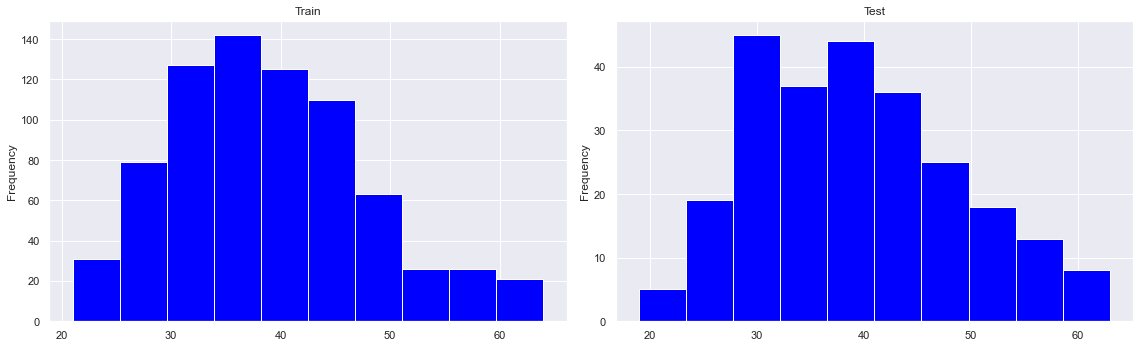

In [11]:
#Target distribution

fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

KeyError: 'Length'

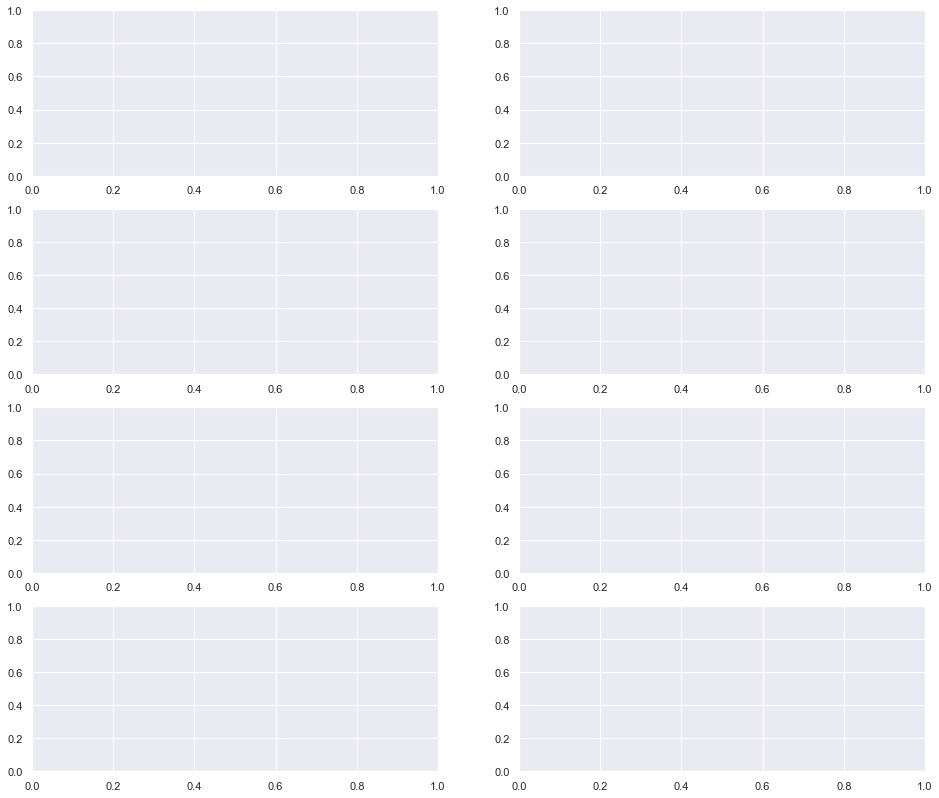

In [12]:
#Distribution of the numerical features:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='blue', bins=30)
    
plt.tight_layout()
plt.show()

In [ ]:
#Box Plot to check outliers:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

Most of the features contain outliers. Height feature has extreme outliers.

In [ ]:
#Pie Chart for the categorical feature "Sex"
t = train[categorical_feature].value_counts(normalize=True)
t.plot(kind='pie',
       figsize=(5,5),
       title=categorical_feature,
       ylabel="",
       autopct="%.2f",
       fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#Pearson Correlation
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(method='pearson'), annot=True, cbar=False, cmap='Blues')
plt.show()

In [ ]:
# Relation of all the features with target column scatter plot

fig, axes = plt.subplots(4,2,figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    _ = sns.scatterplot(x=train[c], y=train[target],ax=axes[i], color='blue')
    axes[i].set_title(f"{c} Vs age", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('age', fontsize=15)
    
plt.tight_layout()
plt.show()


We can see that some features have linear relationship with the target "Age"

In [ ]:
# Plotting Height vs Length vs Age
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('age')
ax.scatter3D(train['Height'], train['Length'], train[target], c='blue', alpha=0.1);

plt.show()

In [ ]:
#Label encoding

train.Sex = train.Sex.replace({"M":1, "I":0, "F":-1})
test.Sex = test.Sex.replace({"M":1, "I":0, "F":-1})

In [ ]:
#Removing outliers:
idx = train.loc[train.Height>0.4].index
train.drop(idx, inplace=True)

idx = train.loc[train['Viscera weight']>0.6].index
train.drop(idx, inplace=True)

idx = train.loc[train[target]>25].index
train.drop(idx, inplace=True)

In [ ]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.head()

Since it is a regression problem we can use the Root mean squared error as the performance metric.

In [ ]:
models = {'linear_regression':LinearRegression(),
         
         'lasso':Lasso(random_state=1),
         
         'decision_tree':DecisionTreeRegressor(random_state=1),
         
         'random_forest':RandomForestRegressor(random_state=1),
        }

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def eval_model(model, X_train, y_train, X_test, y_test):
    _ = model.fit(X_train, y_train)
    print("Train rmse : ", rmse(y_train, model.predict(X_train)))
    print("Test rmse : ", rmse(y_test, model.predict(X_test)))

In [ ]:
for key, regressor in models.items():
    print(key)
    eval_model(regressor, X_train, y_train, X_test, y_test)
    print("\n\n")

In [ ]:
#Hyperparameter tuning
# Linear regression
lr_params = {'fit_intercept':[True,False]}

# Lasso
lasso_params = {'alpha': [1e-4, 1e-3, 1e-2, 1, 10, 100]}

# Decision tree
dt_params =  {'max_depth': [4, 6, 8, 10, 12, 14, 16, 20],
            'min_samples_split': [5, 10, 20, 30, 40, 50],
            'max_features': [0.2, 0.4, 0.6, 0.8, 1],
            'max_leaf_nodes': [8, 16, 32, 64, 128,256]}

# Random Forest
rf_params = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 150, 200, 250]}

In [ ]:
params = [lr_params, lasso_params, dt_params, rf_params]

# searching Hyperparameters
i=0
for name, model in models.items():
    print(name)
    regressor = RandomizedSearchCV(estimator = model,
                                   n_iter=10,
                                   param_distributions = params[i],
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')
    
    search = regressor.fit(X_train, y_train)
    
    print('Best params :',search.best_params_)
    print("RMSE :", -search.best_score_)
    i+=1
    print()

Since Random Forest is performing better so it is selected

In [ ]:
rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

In [ ]:
#save the model

import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
#Evaluation

print("Train rmse : ", rmse(y_train, model.predict(X_train)))
print("Test rmse : ", rmse(y_test, model.predict(X_test)))

In [ ]:
#Feature importance
df = pd.DataFrame([features, model.feature_importances_]).T
df.columns = ['feature', 'importance']
df.sort_values("importance", ascending=False)

In [ ]:
#Scatter plot
y_pred = model.predict(X_test)

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_pred, color='blue', label='y_pred')
plt.legend()
plt.show()

In [ ]:
#Error distribution
plt.figure(figsize=(10,5))
plt.hist(y_pred-y_test, bins=30)
plt.show()